# Project: Scraping and Analyzing Basketball Statistics with Python

## Objective 
This case study is to be familiarized with web scrapping to collate data from websites, analyze the data, visualize it, and make data-supported inferences.  

## Description
IBM provides projects for their IBM Data Science Professional Certificate course. This project involves web scraping basketball statistics from Wikipedia of some of the greatest basketball players in the world. Then we are to perform some analysis on the data extracted using Pandas, plot, use data to answer some basic questions, then store the data. 

We are collecting the data of Michael Jordan, Kobe Bryant, Lebron James, and Stephen Curry.


## Web Scraping Function

Here we will be importing the necessary library for this project. Then we define the function <code>get_basketball_stats</code>. The function will return a dictionary corresponding to the Regular basketball season statistics of each basketball player scraped from Wikipedia. The input link will be the URL of the Wikipedia page for each player. After, the function will return a Python dictionary where the keys will be the column names, and the values will be a list containing different columns. The elements of each list will be a separate row for that column.

In [1]:
import bs4
import requests 
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# reading the webpage
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michae_Jordan'):
    response=requests.get(link)
    # creating a BeautifulSoup object to parse the HTLM
    soup=bs4.BeautifulSoup(response.text, 'html.parser')
    table=soup.find(class_='wikitable sortable')
    
    #creating headers of the table 
    headers=table.tr
    titles=headers.find_all("abbr")
    data={title['title']:[] for title in titles}
    
    #iterating over each cell in the table
    for row in table.find_all('tr')[1:]:
        for key, a in zip(data.keys(), row.find_all("td")[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c==".")))
    
    # removing extra rows by finding the smallest list
    Min=min([len(x) for x in data.values()])
    for key in data.keys(): #converting keys to floats
        data[key]=list(map(lambda x:float(x), data[key][:Min]))
        
    return data

## Web Scraping the data and Converting to Pandas Dataframe

In [3]:
#all the links for each player 
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']

In [4]:
names=['Michael Jordan', 'Kobe Bryant', 'Lebron James', 'Stephen Curry']

#### *For each player, create a Python dictionary from the Regular basketball season table.*

In [1]:
michael_jordan_dict=get_basketball_stats(links[0])
kobe_bryant_dict=get_basketball_stats(links[1])
lebron_james_dict=get_basketball_stats(links[2])
stephen_curry_dict=get_basketball_stats(links[3])

NameError: name 'get_basketball_stats' is not defined

#### *Now convert the Python Dictionary to a Pandas Dataframe using the <code>pd.DataFrame()</code> constructor.*

In [6]:
michaelJ_table=pd.DataFrame(michael_jordan_dict)
kobeB_table=pd.DataFrame(kobe_bryant_dict)
lebronJ_table=pd.DataFrame(lebron_james_dict)
stephenC_table=pd.DataFrame(stephen_curry_dict)

#### *Here each player's data will be displayed in the first five rows of the Dataframe, and print above the Dataframe.*

In [7]:
data_frame=[michaelJ_table, kobeB_table, lebronJ_table, stephenC_table]
df=data_frame

In [8]:
i=0
for name in names:
    print(name)
    display(df[i].head())
    i+=1

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


## Plotting the points per game for a player using <code>plt.plot()</code> function

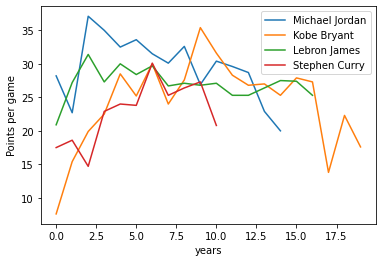

In [9]:
j=0
for name in names:
    plt.plot(df[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')
    j+=1

## Appendix 
*Credits/Citation*

* [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/)

    Joseph Santarcangelo has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


* [Michelle Carey](https://www.linkedin.com/in/michelleccarey/) 

* Mavis Zhou